In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)

In [2]:
df = pd.read_csv("data/heart_dataset.csv")

In [3]:
print(f"Duplicate values of Cleaned Data {round(((df.duplicated().sum()/df.shape[0])*100),2)}")

Duplicate values of Cleaned Data 68.11


In [4]:
df.shape

(1888, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [6]:
cols=ColumnTransformer(
    [
        ('preprocess',StandardScaler(),df.columns[0:-1])
    ]
    ,remainder='passthrough'
)

In [7]:
X=df.iloc[:,:-1]
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

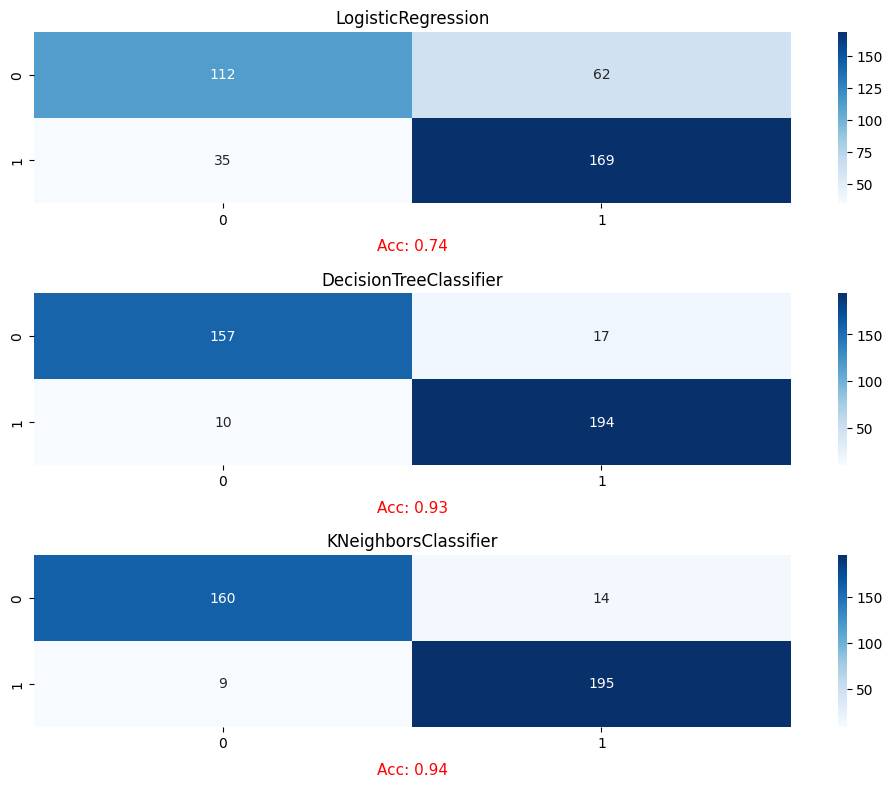

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       174
           1       0.93      0.96      0.94       204

    accuracy                           0.94       378
   macro avg       0.94      0.94      0.94       378
weighted avg       0.94      0.94      0.94       378



In [8]:
models=[LogisticRegression(),DecisionTreeClassifier(max_depth=7),KNeighborsClassifier(n_neighbors=4,metric='euclidean')]


fig,ax=plt.subplots(3,figsize=(10,8))
ax=ax.flatten()

for i,model in enumerate(models):
    
    pipeline=Pipeline(
        [
            ('preprocess',cols),
            ('model',model)
        ]
    )
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)

    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=ax[i]
    )
    ax[i].set_title(model.__class__.__name__)
    ax[i].text(0.5, -0.25, f'Acc: {accuracy_score(y_test,y_pred):.2f}', 
           ha='center', va='center', transform=ax[i].transAxes, fontsize=11, color='red')
plt.tight_layout()
plt.show()
print(classification_report(y_test, y_pred))


In [9]:
model = DecisionTreeRegressor(max_depth=7, random_state=42)

pipeline = Pipeline(
    [
        ('preprocess', cols),
        ('model', model)
    ]
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


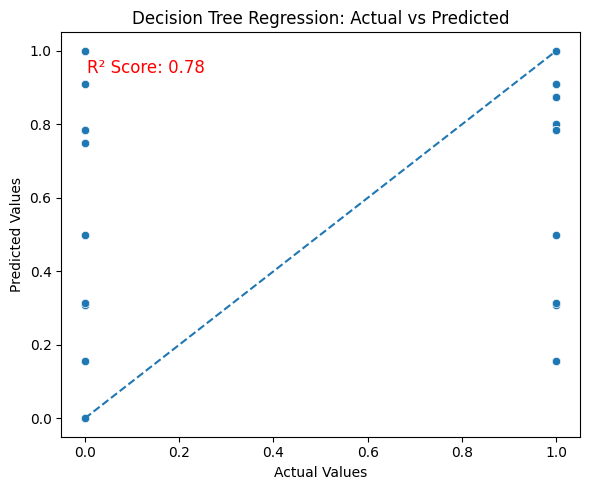

In [10]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs Predicted")

plt.text(
    0.05, 0.9,
    f"R² Score: {r2_score(y_test, y_pred):.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    color='red'
)

plt.tight_layout()
plt.show()


In [11]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


MAE : 0.08539435990734692
MSE : 0.05364527972965607
RMSE: 0.23161450673404735
R²  : 0.7840587066460396


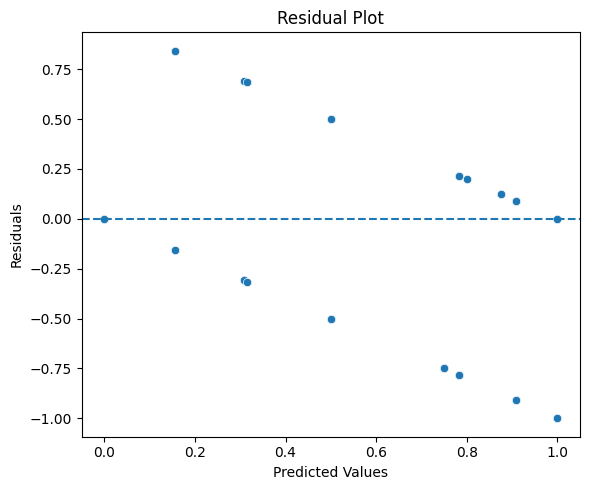

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.tight_layout()
plt.show()
